# Hello World Agent
### Making a Simple Hello World Agent Using LangGraph

We'll be making a simple graph with just a start, a middle node that does something, and then the end
```mermaid
    flowchart LR
    Start --> Node --> End
```

In [61]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

### AgentState
We'll create a shared data structure that keeps track of the information we require as the application runs.

In [62]:
class AgentState(TypedDict): # this is the state schema
    name: str
    greeting: str
    compliment: str

### Node
Just a simple python function that takes the current state as an input and outputs the current state.

In [63]:
def greeting_node(state: AgentState) -> AgentState:
    """Just the first node that adds a greeting message to the current state."""
    state['greeting'] = "Hey " + state['name'] + " how's it going?"
    return state

## Creating the actual Graph
make a variable that stores the StateGraph, pass in the state schema defined above into StateGraph
- To add a node to the graph, use `graph.add_node()` and add the nodefunction (action) defined above.

In [64]:
graph = StateGraph(AgentState)
graph.add_node("greeter", greeting_node)

# you already have the start and end, and the greeter node defined in the graph, so now just connect the greeter node to the start and end node.
graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

# compile the graph at the end, store it in an application variable.
app = graph.compile()

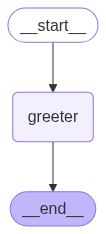

In [65]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

Running the graph and getting the result

In [66]:
result = app.invoke({"name": "Dhruv"})
result['greeting']

"Hey Dhruv how's it going?"

## Let's make a simple graph with two nodes now.

```mermaid
    flowchart LR
    A[Start] --> B[Give a greeting]
    B[Give a greeting] --> C[Give a compliment]
    C[Give a compliment] --> D[End]
```

Adding another node, that compliments the person

In [67]:
def compliment_node(state: AgentState) -> AgentState:
    """ Second node that adds a compliment to the person"""
    state['compliment'] = "You're doing great," + state['name'] + "!"
    return state

Creating the graph and compiling it again

In [72]:
graph2 = StateGraph(AgentState)
graph2.add_node("greeter node", greeting_node)
graph2.add_node("complimenter node", compliment_node)

graph2.set_entry_point("greeter node")
graph2.add_edge("greeter node", "complimenter node") # more on how to add edges in later notebooks
graph2.set_finish_point("complimenter node")

app2 = graph2.compile()

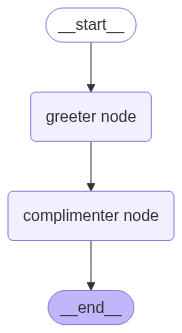

In [69]:
display(Image(app2.get_graph().draw_mermaid_png()))

In [70]:
result = app2.invoke({'name':"Dhruv"})
result['greeting']

"Hey Dhruv how's it going?"

In [71]:
result['compliment']

"You're doing great,Dhruv!"